In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import the pakeges

In [2]:
data = pd.read_csv("Dream.csv")
#load the data

In [8]:
data

,Unnamed: 0,Title,Url,Time,Content
0,0,"How old is Blac Chyna, is she pregnant, who’s ...",https://www.thesun.co.uk/https://www.thesun.co...,20180503,"BLAC Chyna is a former stripper, turned Instag..."
1,1,What’s on TV tonight? Shows to watch on Sunday...,https://www.thesun.co.uk/https://www.thesun.co...,20180429,WHAT can't you miss on TV tonight? Our guide t...
2,2,Tottenham ‘ready to sell Mousa Dembele and eye...,https://www.thesun.co.uk/https://www.thesun.co...,20180417,TOTTENHAM are reportedly willing to let Mousa ...
3,3,Cricket bible Wisden bans ‘chinaman’ term for ...,https://www.thesun.co.uk/https://www.thesun.co...,20180412,"CRICKET bible Wisden has banned the term ""chin..."
4,4,May and Corbyn’s pathetic deal is a grotesque ...,https://www.thesun.co.uk/https://www.thesun.co...,20190505,DO Theresa May and new best mate Jeremy Corbyn...
5,5,Today’s Google Doodle – what is the Heisei per...,https://www.thesun.co.uk/https://www.thesun.co...,20190430,GOOGLE has produced a special Doodle on April ...
6,6,Angelina Jolie’s plan to move kids to UK durin...,https://www.thesun.co.uk/https://www.thesun.co...,20190426,7ANGELINA JOLIE is causing further tension in ...
7,7,Sri Lanka bombings – Brit victim’s family fear...,https://www.thesun.co.uk/https://www.thesun.co...,20190424,AN IT director feared to be the final Brit kil...
8,8,Chinese snooker star Luo Honghao record worst-...,https://www.thesun.co.uk/https://www.thesun.co...,20190422,LUO HONGHAO is officially the WORST player in ...
9,9,Man Utd suffer biggest ever Euro loss after ca...,https://www.thesun.co.uk/https://www.thesun.co...,20190416,MANCHESTER UNITED suffered their biggest-ever ...


In [4]:
import calendar

In [5]:
neg = {}
pos = {}
neu = {}

In [6]:
data['Time'][0].split()[0][:-2]

'3'

In [7]:
for i in range(len(data)):
    time = 0
    try:
        if data['Time'][i] != 'None':
            d1 = data['Time'][i].split()[2][:-1]
            d2 =list(calendar.month_name).index(data['Time'][i].split()[1])
            if int(d2) < 10:
                d2 = '0' + str(d2)
            d3 = data['Time'][i].split()[0][:-2]
            if int(d3) < 10:
                d3 = '0' + str(d3)
            #print(d1,d2,d3)
            data['Time'][i] = int(d1 + str(d2) + str(d3))
    except BaseException:
        pass
        

/home/sunny/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

for i in range(len(data)):
    ss = sid.polarity_scores(data['Content'][i])
    T = data['Time'][i]
    if T != 'None':
        neg[str(T)] = ss['neg']
        pos[str(T)] = ss['pos']
        neu[str(T)] = ss['neu']
    else:
        neg[str(0)] = ss['neg']
        pos[str(0)] = ss['pos']
        neu[str(0)] = ss['neu']

In [10]:
pos = sorted(pos.items(), key = lambda k:k[0])
neg = sorted(neg.items(), key = lambda k:k[0])
neu = sorted(neu.items(), key = lambda k:k[0])

In [14]:
pos = pos[:-1]
neg = neg[:-1]

In [15]:
def Process(L):
    List = [[],[]]
    stime = int(L[0][0]) // 100 * 100
    ntime = stime + 100
    sum = 0
    count = 0
    for a in L:
        t = int(a[0])
        k = t//100 - stime//100
        if t >= ntime:
            List[0].append(stime/10000)
            List[1].append(sum/count)
            stime = stime + 100*k
            ntime = ntime + 100*k
            count = 0
            sum = 0
        if t >= stime and t <= ntime:
            sum = sum + a[1]
            count = count + 1
    l = {
    'index' : [],
    'time' : [],
    'value' : []
    }
    c = 0
    for i in range(len(List[0]) - 1):
        if List[0][i+1] - List[0][i] != 0.01 and int(List[0][i+1]) == int(List[0][i]):
            n = List[0][i+1]*100 - List[0][i]*100 - 1
            n = int(n)
            if n > 0:
                for j in range(n):
                    c = c + 1
                    l['index'].append(c + i)
                    l['time'].append(List[0][i] + 0.01*(j+1))
                    l['value'].append((List[1][i] + List[1][i+1])/2)
    for i in range(len(l['index'])):
        List[0].insert(l['index'][i],l['time'][i])
        List[1].insert(l['index'][i],l['value'][i])
    return List

In [16]:
Pos = Process(pos)
for i in range(len(Pos[0])):
    Pos[0][i] = str(Pos[0][i])
    if Pos[0][i][-2] == '.':
        Pos[0][i] = Pos[0][i] + '0'
    Pos[0][i] = Pos[0][i][2:]
    if Pos[0][i][-2] == '0':
        Pos[0][i] = Pos[0][i][:-2] + Pos[0][i][-1]

In [17]:
Pos[0][0]

'12.5'

In [23]:
Neg = Process(neg)
for i in range(len(Neg[0])):
    Neg[0][i] = str(Neg[0][i])
Neg[0][1]

'2016.04'

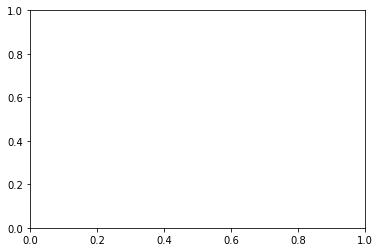

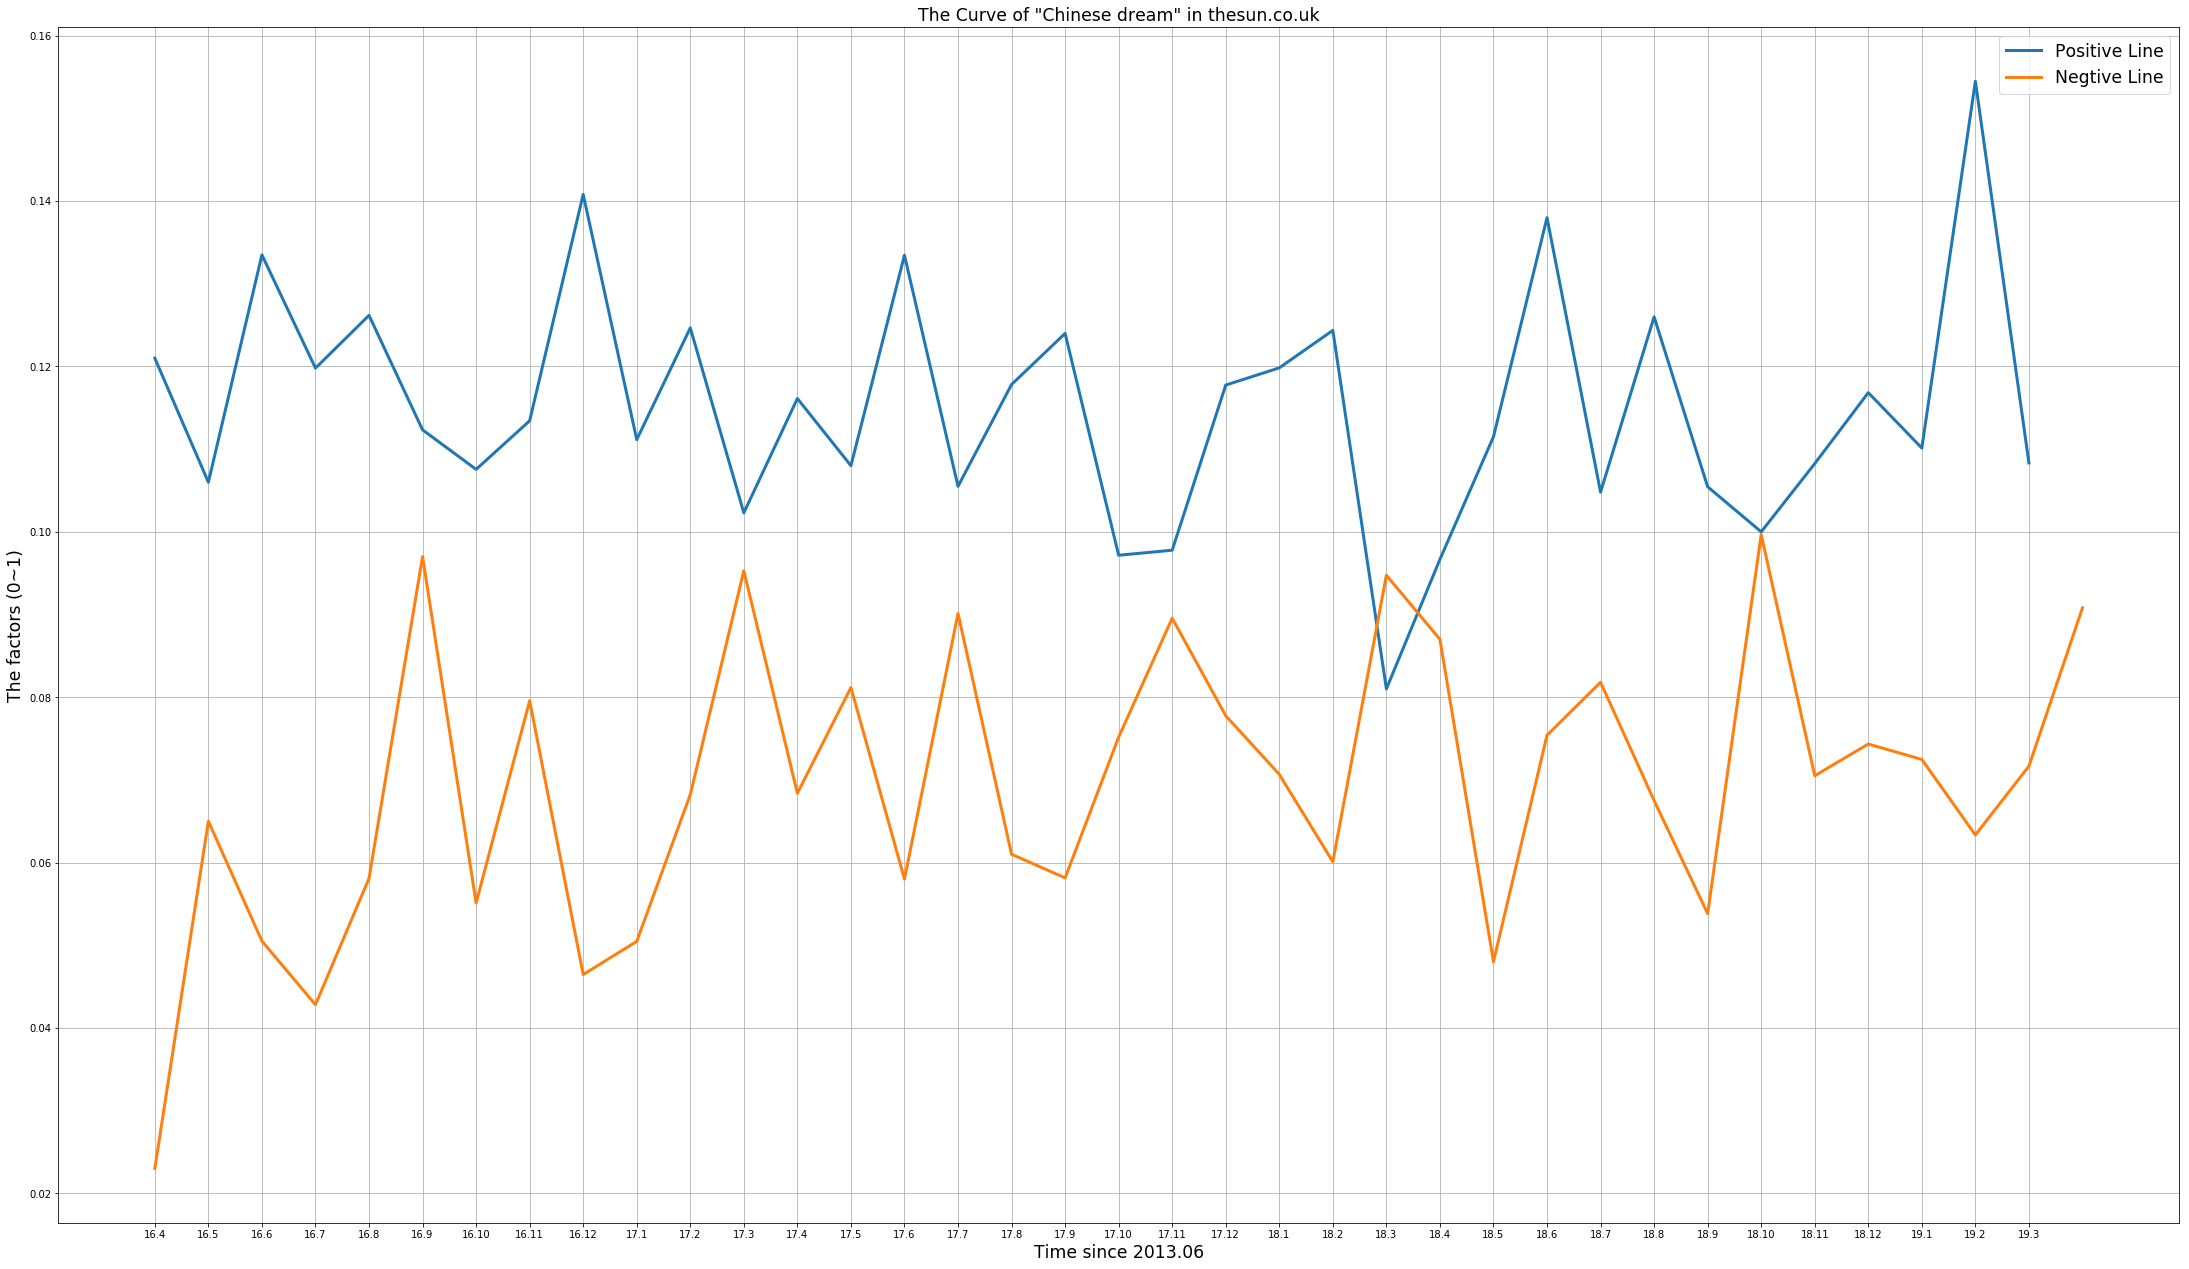

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
x1 = np.arange(0,len(Pos[0][1:]))
y1 = Pos[1][1:]
x2 = np.arange(0,len(Neg[0][1:]))
y2 = Neg[1][1:]
group_labels = Pos[0][1:]
plt.figure(figsize=(38, 22))
plt.plot(x1,y1,lw = 3)
plt.plot(x2,y2,lw = 3)
plt.legend(['Positive Line','Negtive Line'],fontsize = 'xx-large')
my_x_ticks = np.arange(0, len(Pos[0][1:]))
plt.xticks(my_x_ticks, group_labels, rotation=0)
plt.grid()
plt.title('The Curve of "Chinese dream" in thesun.co.uk',fontsize = 'xx-large')
plt.xlabel('Time since 2013.06',fontsize = 'xx-large')
plt.ylabel('The factors (0~1)',fontsize = 'xx-large')
plt.savefig('Dream.jpg')
plt.show()

In [15]:
np.arange(0,len(Pos[1]))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109])

In [33]:
posindex = np.sum(y1)/len(y1)

In [34]:
negindex = np.sum(y2)/len(y2)

In [35]:
posindex,negindex

(0.11505534567556625, 0.0695291903468374)